In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("./Airpollution.csv")

In [3]:
data.size


281556

In [4]:
#вывод первые 10 строк
print(data.head(10))

                    Country              City  AQI Value   
0        Russian Federation        Praskoveya         51  \
1                    Brazil  Presidente Dutra         41   
2                     Italy   Priolo Gargallo         66   
3                    Poland         Przasnysz         34   
4                    France          Punaauia         22   
5  United States of America       Punta Gorda         54   
6                   Germany        Puttlingen         62   
7                   Belgium             Puurs         64   
8        Russian Federation        Pyatigorsk         54   
9                     Egypt            Qalyub        142   

                     AQI Category  CO AQI Value CO AQI Category   
0                        Moderate             1            Good  \
1                            Good             1            Good   
2                        Moderate             1            Good   
3                            Good             1            Good   
4   

In [5]:
#информация о таблице 
data.info(verbose='true', show_counts='true')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [6]:
#тип данных
data.dtypes

Country               object
City                  object
AQI Value              int64
AQI Category          object
CO AQI Value           int64
CO AQI Category       object
Ozone AQI Value        int64
Ozone AQI Category    object
NO2 AQI Value          int64
NO2 AQI Category      object
PM2.5 AQI Value        int64
PM2.5 AQI Category    object
dtype: object

In [7]:

print ( "cols = " , len(data.axes[0]) , "; rows =",  len(data.axes[1]) )

cols =  23463 ; rows = 12


In [8]:
data.keys() # название колонок 

Index(['Country', 'City', 'AQI Value', 'AQI Category', 'CO AQI Value',
       'CO AQI Category', 'Ozone AQI Value', 'Ozone AQI Category',
       'NO2 AQI Value', 'NO2 AQI Category', 'PM2.5 AQI Value',
       'PM2.5 AQI Category'],
      dtype='object')

In [9]:
print  (data.isna().sum())

Country               427
City                    1
AQI Value               0
AQI Category            0
CO AQI Value            0
CO AQI Category         0
Ozone AQI Value         0
Ozone AQI Category      0
NO2 AQI Value           0
NO2 AQI Category        0
PM2.5 AQI Value         0
PM2.5 AQI Category      0
dtype: int64


In [10]:
duplicates = data.duplicated()
print("Number of duplicates:", duplicates.sum())
#print("Number of rows before removing duplicates:", len(data))
#duplicates = data.duplicated()
#print("Number of duplicates:", duplicates.sum())
#data = data.drop_duplicates()
#print("Number of rows after removing duplicates:", len(data))

# ¯\_(ツ)_/¯ ну вроде нет дубликатов. 

Number of duplicates: 0


In [11]:
# как я понимаю доминирует строковый тип который определяется как object

In [12]:
# да много значенй в country и одно cyty

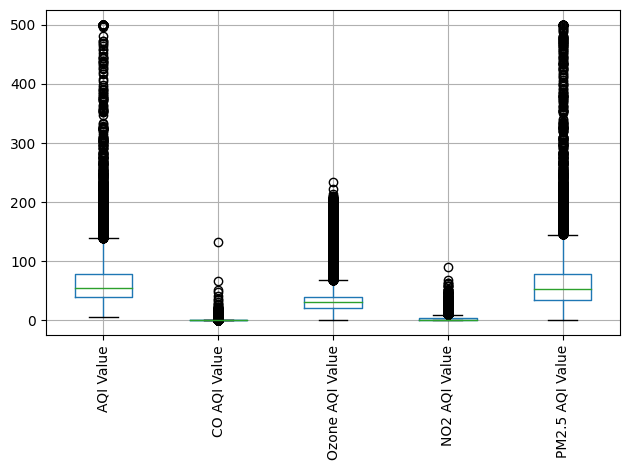

In [13]:
fig, ax = plt.subplots()
ax = data.boxplot()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show() # ееееее рок!

In [14]:
# очень много вбросов . 

In [15]:
numeric_data = data.select_dtypes(exclude =['object'])
df = pd.DataFrame(numeric_data)

array([[<Axes: title={'center': 'AQI Value'}>,
        <Axes: title={'center': 'CO AQI Value'}>],
       [<Axes: title={'center': 'Ozone AQI Value'}>,
        <Axes: title={'center': 'NO2 AQI Value'}>],
       [<Axes: title={'center': 'PM2.5 AQI Value'}>, <Axes: >]],
      dtype=object)

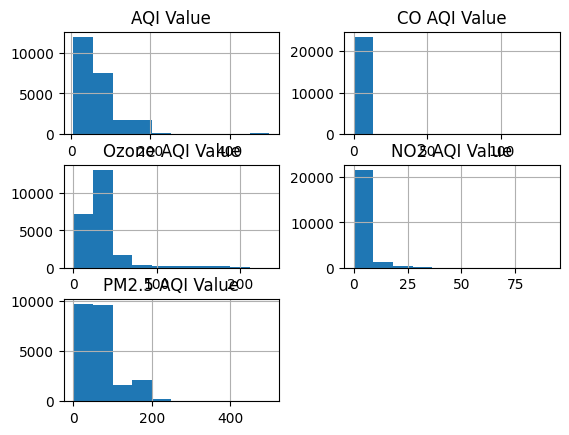

In [16]:
df.hist()

In [17]:
#df.apply(lambda x: np.log(x))

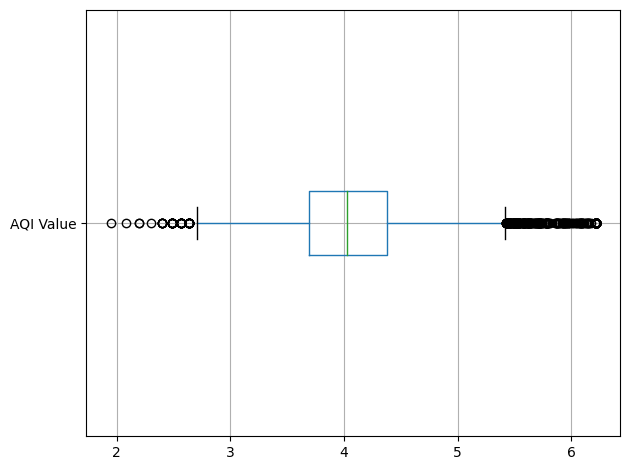

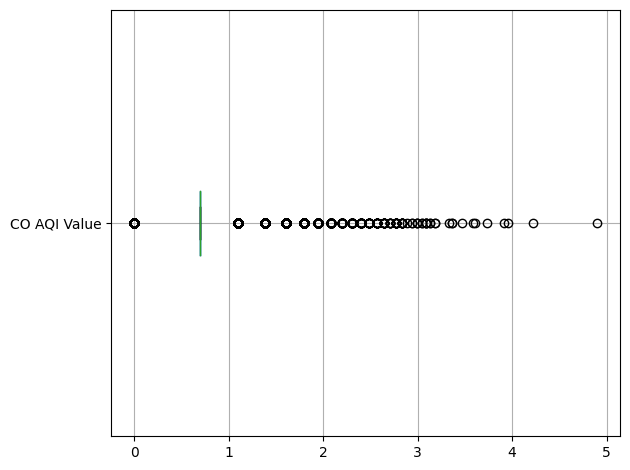

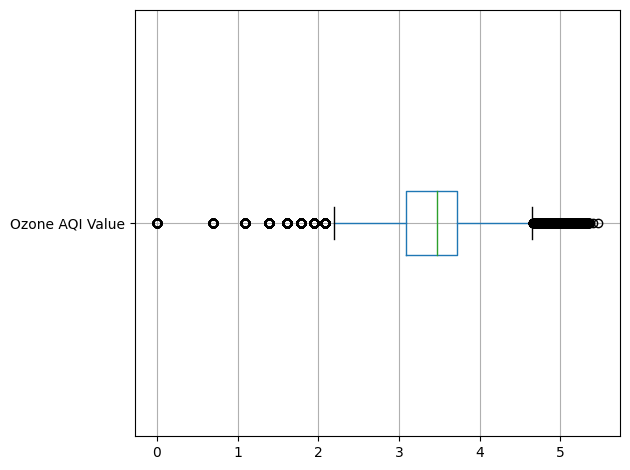

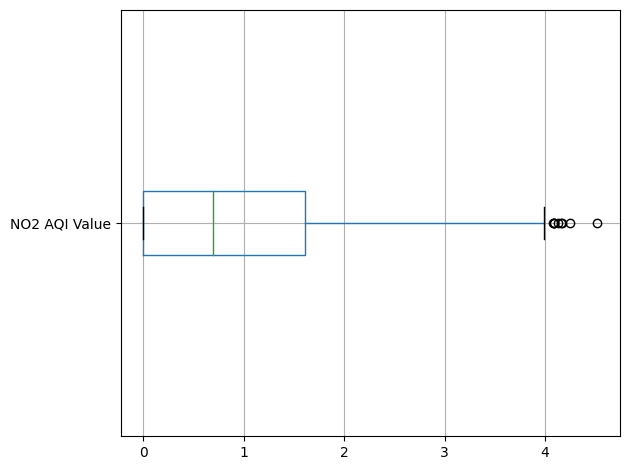

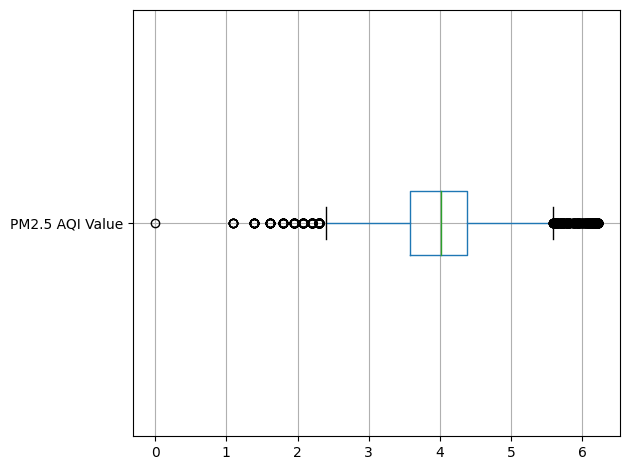

In [18]:
for column in df:
    if np.issubdtype(df[column].dtype, np.number):
        values = df[column].dropna()
        values = df[column].apply(lambda x: np.log(x+1))
        pd.DataFrame(values).boxplot(vert=False)
    plt.tight_layout()
    plt.show()

In [19]:
#####################################

#          #    ######          #     #          #####
#         # #   #     #         ##    #         #     #
#        #   #  #     #         # #   #               #
#       #     # ######          #  #  #          #####
#       ####### #     #         #   # #         #
#       #     # #     #         #    ##         #
####### #     # ######          #     #         #######



In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [21]:
print (data)
#remember what was there at all.......

                        Country              City  AQI Value AQI Category   
0            Russian Federation        Praskoveya         51     Moderate  \
1                        Brazil  Presidente Dutra         41         Good   
2                         Italy   Priolo Gargallo         66     Moderate   
3                        Poland         Przasnysz         34         Good   
4                        France          Punaauia         22         Good   
...                         ...               ...        ...          ...   
23458                     India      Gursahaiganj        184    Unhealthy   
23459                    France            Sceaux         50         Good   
23460                     India          Mormugao         50         Good   
23461  United States of America       Westerville         71     Moderate   
23462                  Malaysia            Marang         70     Moderate   

       CO AQI Value CO AQI Category  Ozone AQI Value Ozone AQI Category   


In [22]:
features = data.drop('City', axis = 1)

In [23]:
#print(features) check 


In [24]:
target = data['AQI Value']

In [25]:
#data.select_dtypes(exclude =['object'])
features = features.drop('AQI Value',  axis = 1)

In [26]:
print(features)
print(features.dtypes)

                        Country AQI Category  CO AQI Value CO AQI Category   
0            Russian Federation     Moderate             1            Good  \
1                        Brazil         Good             1            Good   
2                         Italy     Moderate             1            Good   
3                        Poland         Good             1            Good   
4                        France         Good             0            Good   
...                         ...          ...           ...             ...   
23458                     India    Unhealthy             3            Good   
23459                    France         Good             1            Good   
23460                     India         Good             1            Good   
23461  United States of America     Moderate             1            Good   
23462                  Malaysia     Moderate             1            Good   

       Ozone AQI Value Ozone AQI Category  NO2 AQI Value NO2 AQ

In [27]:
data_train, data_test, AQIV_train, AQIV_test = train_test_split(features, target, test_size = 0.3, random_state = 32)

In [28]:
#test
print(data_train)

                           Country                    AQI Category   
493    United Republic of Tanzania                            Good  \
6077                        Brazil                        Moderate   
12826                       Brazil                       Unhealthy   
5017      United States of America                        Moderate   
6178            Russian Federation                            Good   
...                            ...                             ...   
19527     United States of America                        Moderate   
20414                        India                       Unhealthy   
9526                   El Salvador                        Moderate   
9771                         India  Unhealthy for Sensitive Groups   
10967                        Italy                            Good   

       CO AQI Value CO AQI Category  Ozone AQI Value Ozone AQI Category   
493               0            Good               14               Good  \
6077     

In [29]:
scaler = StandardScaler()
data_train_fit = scaler.fit_transform(X = data_train.select_dtypes(exclude=['object']))
print(data_train_fit)

[[-0.74555827 -0.7471355  -0.58788542 -0.89383522]
 [ 0.88544768 -0.78205092  0.57060401  0.50507341]
 [ 1.42911634 -1.09628967  2.50141973  1.4990348 ]
 ...
 [ 0.34177903 -1.02645883  0.95676716  0.22897302]
 [-0.74555827 -0.29323508 -0.58788542  0.83639387]
 [-0.20188962  0.33524242 -0.58788542 -0.65454822]]


In [30]:
print(AQIV_train)

493       20
6077      96
12826    150
5017      58
6178      42
        ... 
19527     51
20414    175
9526      81
9771     114
10967     45
Name: AQI Value, Length: 16424, dtype: int64


In [31]:
#scaler.fit(data_test.select_dtypes(exclude=['object']))
data_test_fit = scaler.transform(data_test.select_dtypes(exclude=['object']))

In [32]:
print(data_test_fit)

[[-0.20188962  0.30032701 -0.58788542 -0.63614152]
 [-0.20188962  0.30032701 -0.39480385 -0.32322775]
 [-0.20188962 -0.18848883 -0.39480385  0.08171948]
 ...
 [-0.74555827 -0.81696633 -0.39480385 -0.91224191]
 [-0.20188962 -0.08374258  0.18444087 -0.08394075]
 [-0.20188962 -0.81696633 -0.39480385 -0.48888798]]


In [33]:
enc  = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [34]:
enc.fit(data_train.select_dtypes(exclude=['int64']))
data_train_OHE =  enc.transform(data_train.select_dtypes(exclude=['int64']))

/home/alehay/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [35]:
print (data_train_OHE)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [36]:
enc.fit(data_test.select_dtypes(exclude=['int64']))
data_test_OHE = enc.transform(data_test.select_dtypes(exclude=['int64']))

/home/alehay/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [37]:
print(data_test_OHE)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [38]:
data_train_res = pd.concat([pd.DataFrame(data_train_fit), pd.DataFrame(data_train_OHE)], axis = 1)

In [39]:
print(data_train_res)

            0         1         2         3    0    1    2    3    4    5     
0     -0.745558 -0.747135 -0.587885 -0.893835  0.0  0.0  0.0  0.0  0.0  0.0  \
1      0.885448 -0.782051  0.570604  0.505073  0.0  0.0  0.0  0.0  0.0  0.0   
2      1.429116 -1.096290  2.501420  1.499035  0.0  0.0  0.0  0.0  0.0  0.0   
3     -0.201890 -0.886797  2.308338 -0.194381  0.0  0.0  0.0  0.0  0.0  0.0   
4     -0.201890 -0.013912 -0.587885 -0.488888  0.0  0.0  0.0  0.0  0.0  0.0   
...         ...       ...       ...       ...  ...  ...  ...  ...  ...  ...   
16419 -0.201890 -0.048827 -0.008641 -0.323228  0.0  0.0  0.0  0.0  0.0  0.0   
16420 -0.201890  0.160665 -0.587885  1.959202  0.0  0.0  0.0  0.0  0.0  0.0   
16421  0.341779 -1.026459  0.956767  0.228973  0.0  0.0  0.0  0.0  0.0  0.0   
16422 -0.745558 -0.293235 -0.587885  0.836394  0.0  0.0  0.0  0.0  0.0  0.0   
16423 -0.201890  0.335242 -0.587885 -0.654548  0.0  0.0  0.0  0.0  0.0  0.0   

       ...  185  186  187  188  189  190  191  192 

In [40]:
data_test_res = pd.concat([pd.DataFrame(data_test_fit), pd.DataFrame(data_test_OHE)], axis = 1)

In [41]:
print(data_test_res)

           0         1         2         3    0    1    2    3    4    5     
0    -0.201890  0.300327 -0.587885 -0.636142  0.0  0.0  0.0  0.0  0.0  0.0  \
1    -0.201890  0.300327 -0.394804 -0.323228  0.0  0.0  0.0  0.0  0.0  0.0   
2    -0.201890 -0.188489 -0.394804  0.081719  0.0  0.0  0.0  0.0  0.0  0.0   
3    -0.745558 -0.677305 -0.587885 -0.599328  0.0  0.0  0.0  0.0  0.0  0.0   
4    -0.201890 -0.118658  0.763686 -0.360041  0.0  0.0  0.0  0.0  0.0  0.0   
...        ...       ...       ...       ...  ...  ...  ...  ...  ...  ...   
7034  0.341779 -1.201036 -0.587885 -0.286414  0.0  0.0  0.0  0.0  0.0  0.0   
7035 -0.201890 -0.013912 -0.008641 -0.102347  0.0  0.0  0.0  0.0  0.0  0.0   
7036 -0.745558 -0.816966 -0.394804 -0.912242  0.0  0.0  0.0  0.0  0.0  0.0   
7037 -0.201890 -0.083743  0.184441 -0.083941  0.0  0.0  0.0  0.0  0.0  0.0   
7038 -0.201890 -0.816966 -0.394804 -0.488888  0.0  0.0  0.0  0.0  0.0  0.0   

      ...  165  166  167  168  169  170  171  172  173  174  
0

In [42]:
#видно что данные нормализовались, числовые значение теперь подают в диапазон от -1 до 1 

In [43]:
# булевы значения которые определяют признак преобрели значения 0 или 1 . 